<a href="https://colab.research.google.com/github/mrunalmania/Pytorch-Learning/blob/main/03_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# computer vision lib in pytorch
* `torchvision`  base domain library for pytorch computer vision

* `torchvision.datasets` - get dataset and dataloading functions for computer vision

* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems

* `torchvision.transforms` - functions for manipuulating your vision data (images) to be suitable for use with an ML model.

* `torch.utils.data.Dataset` - Base dataset class for pytorch.

* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset.


In [ ]:
# import pytoch
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# check the version
print(torch.__version__)
print(torchvision.__version__)

2.0.0+cu118
0.15.1+cu118


# Getting a dataset
The dataset we are sing `FashionMNIST`

In [ ]:
# Training data
train_data = datasets.FashionMNIST(
    root='data', # where to download the data to?
    train=True, # do we want training dataset
    download = True, # do we want to download in
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the data
    target_transform= None # how do we want to transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root = 'data',
    train= False,
    download=True,
    transform=ToTensor(),
    target_transform=None

)


In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
# See the first training example
image,label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names 

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
# check the shape
print(f"Image shape: {image.shape} -> [color, height, width]")
print(f"Label : {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color, height, width]
Label : Ankle boot


In [ ]:
class_names[label]

'Ankle boot'

Color images have three color chanel , red,green,blue.

But gray images have 1 color chanel (black or white pixel).

Image shape : torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

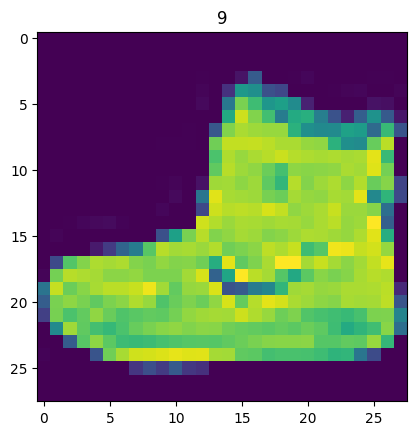

In [ ]:
# Visualizing sample image data.
image, label = train_data[0]

print(f"Image shape : {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)
 

(-0.5, 27.5, 27.5, -0.5)

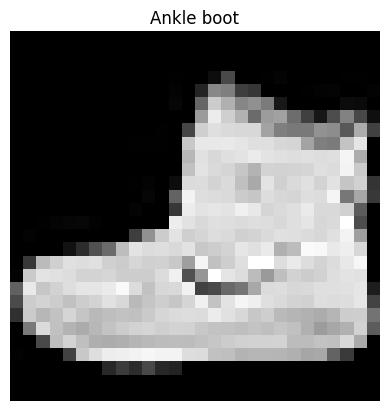

In [ ]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)

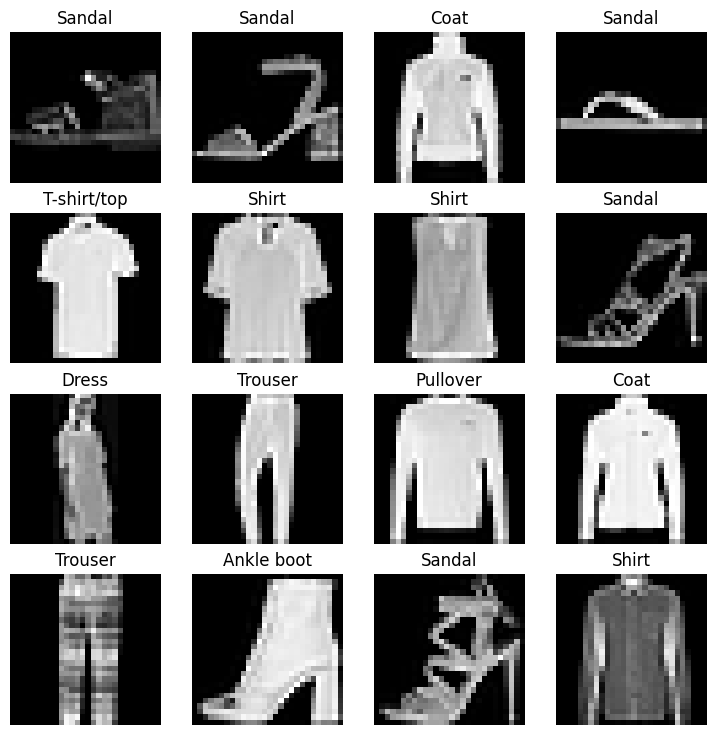

In [ ]:
# plot more images
# torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
row,cols = 4,4
for i in range(1, row*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  # print(random_idx)
  img, lbl = train_data[random_idx]
  fig.add_subplot(row,cols,i)
  plt.imshow(img.squeeze(), cmap='gray')
  plt.title(class_names[lbl])
  plt.axis(False)

Do you think these items of clothing (images) could be modelled with pure linear lines? Or do you think we will need non-linear lines.


## 2. Prepare dataloader

Right now, our data is in form of PyTorch Datasets.

DataLoader turns our dataset into python iterable.

More specifically, we want to turn our data into batches (or mini-batches)

Why would we do this?
1. It is more computationally effcient, as in, your computing hardware may not be able to load (store in memory) 60000 images in one hit.

2. It gives our neural network more chances to update its gradient descent per epoch.

For more infor : Andrew NG course.

In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(train_data,
                              batch_size = BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=True)

In [ ]:
# Let's chech out what we created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)}")
print(f"Length of test dataloader: {len(test_dataloader)}")


DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f31d2dcbca0>, <torch.utils.data.dataloader.DataLoader object at 0x7f31d2da2520>)
Length of train dataloader: 1875
Length of test dataloader: 313


In [ ]:
# check what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 1, label size: torch.Size([])


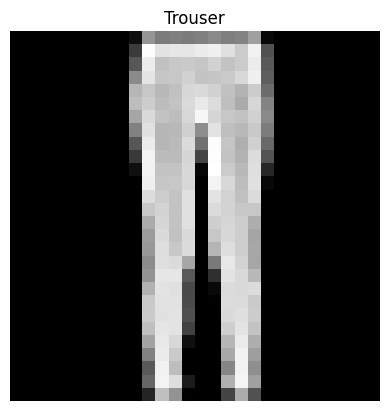

In [ ]:
# show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]

plt.imshow(img.squeeze(),cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## Model 0: Build a baseline model

When starting to build a series of machine learning model, it's best practice to start with baseline model.

Baseline model is a simple model you will try and imporove upon subsequent models/experimentations.

In other words: start simply and add complexity when necessary.

In [ ]:
# create an flatten layer
flatten_model = nn.Flatten()

# get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x)

# print out what happended
print(f"Shape before flattening: {x.shape} -> [color channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color channel, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color channel, height*width]


In [ ]:
output.squeeze()

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039,
        0.0000, 0.0000, 0.0000, 0.4706, 0.3686, 0.5725, 0.4431, 0.2392, 0.3961,
        0.0196, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.1490, 0.6039, 0.8667, 0.6353, 0.7804, 0.5804, 0.5216,
        0.5765, 0.5765, 0.2118, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.6039, 0.8196, 0.7020, 0.7569, 0.4627, 0.5765, 0.6745,
        0.3725, 0.7412, 0.7725, 0.8078, 0.7882, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape: int,
               hidden_units: int,
               output_shape: int) -> None:
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
        
    )

  def forward(self,x):
    return self.layer_stack(x)
  

In [ ]:
torch.manual_seed(42)

#setup model with input_parameters
model_0 = FashionMNISTModelV0(
    input_shape = 784, #this is 28*28
    hidden_units=10, # how many units in the hidden layer
    output_shape= len(class_names)
).to('cpu')

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x )

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [ ]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

## 3.1 setup loss, optimizer, and evaluation metric

* loss function: since we are working with multi-class data, our loss will be `nn.CrossEntropyLoss()`

* optimizer: our optimizer `torch.optim.SGD()` (stochastic gradient descent)

* Evaluation metric - since we are working with classification problem, let's use accuracy as our evaluation metric.



In [ ]:
import requests
from pathlib import Path

#Download helper function from learn Pytorch repo.

if Path('helper_functions.py').is_file():
  print("Helper function already exists....")
else:
  print('Download the function')
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
  with open("helper_functions.py",'wb') as f:
    f.write(request.content)

Helper function already exists....


In [ ]:
# import accuracy metric
from helper_functions import accuracy_fn

# set up loss  funtion and optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr =0.1)


## 3.2 creating a function to time our experiments

Machine learning is very experimental

Two main things you'll often want to track are:

1. Model's performance (loss and accuracy values etc.)
2. How fast it runs

In [ ]:
from timeit import default_timer as timer

def print_train_time(start:float, end:float,device:torch.device = None):
  """ Prints difference between start and end time..."""

  total_time = end-start
  print(f"Train time on {device} : {total_time:3f} seconds")
  return total_time


In [ ]:
start_time = timer()
# some  code...
end_time = timer()
print_train_time(start_time,end_time,'cpu')

Train time on cpu : 0.000027 seconds


2.7396999939810485e-05

In [ ]:
## Upto here 3.3 Creating a training loop and training a model on batches of data....
# Highlight that the optimizer will update a model's parameters once per batch rather than once per epoch..


### Creatiing a training loop and training a model on batches of data.

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*
4. Print what's happenin
5. Time it all (Fun)

In [ ]:
from torch.autograd.grad_mode import inference_mode
# Import tqdm for progress path.
from tqdm.auto import tqdm

# set the seed and start the timer.
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# set the number of epochs (we will keep this small for faster training time.)
epochs = 3

# create a training loop.
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  ## Training
  train_loss = 0

  # Add a loop to loop through training batches.
  for batch , (X,y) in enumerate(train_dataloader):
    model_0.train()

    # 1. forward pass
    y_pred = model_0(X)

    # Calculate loss(per batch)
    loss = loss_fn(y_pred,y)
    train_loss+=loss # we need to accumulate the training loss value , to find outat the end the average loss per batch.

    # optimizer zero grad
    optimizer.zero_grad()

    # loss backward
    loss.backward()

    # optmizer step step step.
    optimizer.step()  # we optimizer will update parameter once per batch not once per epoch.


    # print out whats happein
    if batch %  400 == 0:
      print(f"Looked at {batch* len(X)}/{len(train_dataloader.dataset)} samples")
  
  # Divide total train loss by length of train loader.
  train_loss /= len(train_dataloader)

  ## Testing loop.
  test_loss , test_acc = 0,0
  model_0.eval()

  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      # forward pass 
      test_pred = model_0(X_test)

      # Calcuate the loss (accumulatively)
      test_loss += loss_fn(test_pred, y_test)
      
      # Calculate accuracy
      test_acc += accuracy_fn(y_test,test_pred.argmax(dim=1)) # because our raw output is in form of logits, and our accuracy function accept the tru labels and predictons in same format.

    #calculate the test loss average per batch.
    test_loss/=len(test_dataloader)

    # calculate the test acc average per batch.
    test_acc/=len(test_dataloader)

  # Print out what's happenin
  print(f"\n Train loss: {train_loss:.4f} | Test loss: {test_loss:.4f} | Test Acc: {test_acc:.4f}")

# Calculate the training time.
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

       

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

 Train loss: 0.5904 | Test loss: 0.5102 | Test Acc: 82.0387
Epoch: 1
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

 Train loss: 0.4743 | Test loss: 0.5268 | Test Acc: 81.6793
Epoch: 2
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

 Train loss: 0.4537 | Test loss: 0.5126 | Test Acc: 82.9972
Train time on cpu : 31.257574 seconds


In [ ]:
str(next(model_0.parameters()).device)


'cpu'

## 4. make predictions and get model 0 results

In [ ]:

torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn):
  """ Returns a dictionary containing the results of model predicting on data_loader."""
  loss, acc = 0,0

  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader) :
    
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and accuracy values per batch
      loss+=loss_fn(y_pred,y)
      acc+=accuracy_fn(y, y_pred.argmax(dim=1))

    # Scale the loss and acc to find average loss and acc per batch
    loss/=len(data_loader)
    acc/=len(data_loader)

  return {"model_name": model.__class__.__name__, # this only works when mode was created with class.
          "model_loss": loss.item(),
          "model_acc": acc}
  
# calculate model 0 result.
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.512529730796814,
 'model_acc': 83.00718849840256}

### 5. setup device agnostic-code (for using GPU if there is one)


In [ ]:
!nvidia-smi

Tue Apr 18 16:00:28 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
torch.cuda.is_available()

True

In [ ]:
# setup device-agnostic code.
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## Model 1: building a better model with non-linearity.

We learned about the power of non-linearity in notebook 02.



In [ ]:
# Create a model with non-linear and linear layer.
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)
    


In [ ]:
next(model_0.parameters()).device


device(type='cpu')

In [ ]:
device

'cuda'

In [ ]:
torch.manual_seed(42)
# lets instantiate the FashionMNISTModelV1
model_1 = FashionMNISTModelV1(input_shape=784, # this is the output of the flatten layer after our 28*28 image goes in
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
# create a loss function and optimizer
loss_fn_2 = nn.CrossEntropyLoss() # going to measure how wrong our model is.

optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr = 0.1) # tries to update our models parametrs to reduce the loss.



### 6.2 Functionizing training and evaluation/testing 

Let's create a function for:
* training loop - `train_step()`
* testing loop - `test_step()`


In [ ]:
# build a training loop. lets try to make a function.
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_function:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  ## Training
  train_loss = 0
  train_acc = 0

  # Put the model into training mode
  model.train()

  # Add a loop to loop through training batches.
  for batch , (X,y) in enumerate(data_loader):
    # put the data into target device
    X,y = X.to(device), y.to(device)

    # 1. forward pass
    y_pred = model(X)

    # Calculate loss(per batch)
    loss = loss_fn(y_pred,y)
    train_loss+=loss # we need to accumulate the training loss value , to find outat the end the average loss per batch.
    train_acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1)) # go from logits to prediction labels

    # optimizer zero grad
    optimizer.zero_grad()

    # loss backward
    loss.backward()

    # optmizer step step step.
    optimizer.step()  # we optimizer will update parameter once per batch not once per epoch.
  
  # Divide total train loss and accuracy by length of train loader.
  train_loss /= len(data_loader)
  train_acc/=len(data_loader)
  print(f"Trai loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")


In [ ]:
# build a test_step() function
def test_step(model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              data_loader: torch.utils.data.DataLoader,
              device: torch.device = device):
  """Performs a testin loop step on model going over data_loader."""
  test_loss , test_acc = 0,0

  # put the model on eval mode.
  model.eval()

  # turn on inference_mode.
  with torch.inference_mode():
    for X,y in data_loader:

      # send the data to target device
      X,y = X.to(device),y.to(device)
      
      # forward pass 
      test_pred = model(X)

      # Calcuate the loss (accumulatively)
      test_loss += loss_fn(test_pred, y)
      
      # Calculate accuracy
      test_acc += accuracy_fn(y,test_pred.argmax(dim=1)) # because our raw output is in form of logits, and our accuracy function accept the tru labels and predictons in same format.
                                                              # go from logits-> rediction labels.
    #calculate the test loss average per batch.
    test_loss/=len(data_loader)

    # calculate the test acc average per batch.
    test_acc/=len(data_loader)

    # print metrics
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")


In [ ]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start = timer()

# set epochs
epochs = 3

# Create a optmization and evaluation loop using train_step() and test_step()
for epoch in range(epochs):
  print(f"Epoch: {epoch}\n--------------------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_function=loss_fn_2,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn_2,
            accuracy_fn=accuracy_fn,
            device=device)
  
train_time_end  = timer()

total_train_time_model_1 = print_train_time(start=train_time_start,end=train_time_end,device=device)


Epoch: 0
--------------------
Trai loss: 1.09199 | Train acc: 61.34%
Test loss: 0.95690 | Test acc: 64.98%

Epoch: 1
--------------------
Trai loss: 0.73779 | Train acc: 73.69%
Test loss: 0.72388 | Test acc: 74.21%

Epoch: 2
--------------------
Trai loss: 0.66776 | Train acc: 76.08%
Test loss: 0.68751 | Test acc: 75.64%

Train time on cuda : 35.304036 seconds


> **Note** Sometimes, depending on your data/hardware you might find that your model trains faster on CPU then GPU.

> Why is this?

> 1. It could be that the overhead for copying data/mode to and from the GPU outweighs the compute benefits offered by the GPU.

>2. The hardware you are using has a better CPU in terms compute capability than GPU.

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.512529730796814,
 'model_acc': 83.00718849840256}

In [ ]:
total_train_time_model_0 

31.257573944000114

In [ ]:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
  """ Returns a dictionary containing the results of model predicting on data_loader."""
  loss, acc = 0,0

  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader) :

      # Put the data on target device
      X,y = X.to(device) , y.to(device)

      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and accuracy values per batch
      loss+=loss_fn(y_pred,y)
      acc+=accuracy_fn(y, y_pred.argmax(dim=1))

    # Scale the loss and acc to find average loss and acc per batch
    loss/=len(data_loader)
    acc/=len(data_loader)

  return {"model_name": model.__class__.__name__, # this only works when mode was created with class.
          "model_loss": loss.item(),
          "model_acc": acc}
  

In [ ]:
# Get the model_1 result dictionary
model_1_result = eval_model(model=model_1,
                            data_loader=test_dataloader,
                            loss_fn = loss_fn_2,
                            accuracy_fn=accuracy_fn)
model_1_result

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.687465250492096,
 'model_acc': 75.64896166134186}

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.512529730796814,
 'model_acc': 83.00718849840256}

## Model 2: Building  a convolutional neural network (CNN)

CNN's also known as ConvNets

CNN's are known for their capabilities to find patterns in visual data.

In [ ]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  """ Model architecture that replicated the TinyVGG
    model from CNN explainer website."""
  def __init__(self,input_shape:int, hidden_units:int, output_shape:int):
    super().__init__()
    self.conv_block = nn.Sequential(
        # create a conv layer.
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),# values we can set ourselved in our NN's are called hyperparameter.
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)

    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features= hidden_units*7*7, #there's a trick to calcilating this
                  out_features=output_shape
                  )
        
    )
  def forward(self,x):
    x = self.conv_block(x)
    # print(f"Output shape of conv_block 1: {x.shape}")
    x = self.conv_block_2(x)
    # print(f"Output shape of conv_block 2: {x.shape}")
    
    x = self.classifier(x)
    # print(f"Output shape of classifier: {x.shape}")
    
    return x


In [ ]:
10*7*7

490

In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape = len(class_names)).to(device)

In [ ]:
image.shape

torch.Size([1, 28, 28])

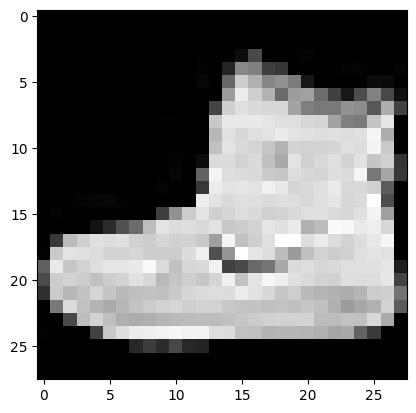

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
model_2(image.unsqueeze(dim=0).to(device))

tensor([[ 0.0246, -0.0644,  0.0551, -0.0360, -0.0139,  0.0113, -0.0014, -0.0075,
          0.0213,  0.0076]], device='cuda:0', grad_fn=<AddmmBackward0>)

### 7.1 stepping through conv2d


In [ ]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Image shape: {test_image.shape}")
print(f"Test Samples: {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Image shape: torch.Size([3, 64, 64])
Test Samples: tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7978,

In [ ]:
model_2.state_dict()

OrderedDict([('conv_block.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
        

In [ ]:
torch.manual_seed(42)
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3,3),
                       stride=1,
                       padding=1)

# pass the data through convolutional layer.
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 64, 64])

### 7.2 Stepping through `nn.MaxPool2d`

In [ ]:
test_image.shape

torch.Size([3, 64, 64])

In [ ]:
# Print out original image shape without unsqueeze dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image unsqueezed dimenstion : {test_image.unsqueeze(dim=0).shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size = 2)

# pass data through just conv layer first
test_image_thru_conv = conv_layer(test_image)
print(f" Shape after going through conv_layer(): {test_image_thru_conv.shape}")

# pass the data through max pool layer
test_image_thru_conv_and_pool_layer = max_pool_layer(test_image_thru_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_thru_conv_and_pool_layer.shape}")


Test image original shape: torch.Size([3, 64, 64])
Test image unsqueezed dimenstion : torch.Size([1, 3, 64, 64])
 Shape after going through conv_layer(): torch.Size([10, 64, 64])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([10, 32, 32])


In [ ]:
torch.manual_seed(42)

# Create a random tensor with a similar number of dimensions to our images.
random_tensor = torch.randn(size=(1,1,2,2))

# Create a maxpool layer
max_pool_layer_test = nn.MaxPool2d(kernel_size=2)
max_pool_tensor = max_pool_layer_test(random_tensor)
max_pool_tensor.shape 

torch.Size([1, 1, 1, 1])

### 7.3 setup a loss function and optimizer.

In [ ]:
## setup loss fnction/eval metrics/optimizer

from helper_functions import accuracy_fn

loss_fn_3 = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                               lr = 0.1)


## 7.4 training and testing `model_2` using training and testing function

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure the time
from timeit import default_timer as timer

train_time_start_model_2 = timer()

epochs = 10
for epoch in range(epochs):
  print(f"Epoch: {epoch}\n-----------------")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_function = loss_fn_3,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn = loss_fn_3,
            accuracy_fn=accuracy_fn,
            device=device)
train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(train_time_start_model_2, train_time_end_model_2,device)


  


Epoch: 0
-----------------
Trai loss: 0.30745 | Train acc: 88.83%
Test loss: 0.32330 | Test acc: 88.16%

Epoch: 1
-----------------
Trai loss: 0.29237 | Train acc: 89.32%
Test loss: 0.34221 | Test acc: 87.84%

Epoch: 2
-----------------
Trai loss: 0.28216 | Train acc: 89.82%
Test loss: 0.30414 | Test acc: 89.06%

Epoch: 3
-----------------
Trai loss: 0.27501 | Train acc: 89.97%
Test loss: 0.28993 | Test acc: 89.58%

Epoch: 4
-----------------
Trai loss: 0.26838 | Train acc: 90.30%
Test loss: 0.28405 | Test acc: 89.74%

Epoch: 5
-----------------
Trai loss: 0.26211 | Train acc: 90.42%
Test loss: 0.29060 | Test acc: 89.80%

Epoch: 6
-----------------
Trai loss: 0.25686 | Train acc: 90.80%
Test loss: 0.28723 | Test acc: 89.89%

Epoch: 7
-----------------
Trai loss: 0.25172 | Train acc: 90.84%
Test loss: 0.29684 | Test acc: 88.83%

Epoch: 8
-----------------
Trai loss: 0.24844 | Train acc: 91.02%
Test loss: 0.27865 | Test acc: 90.04%

Epoch: 9
-----------------
Trai loss: 0.24344 | Train a

In [ ]:
# Get model_2 results
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn_3,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.26846742630004883,
 'model_acc': 90.01597444089457}

## 8. Comparing model results and training time.

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                               model_1_result,
                               model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.512530,83.007188
1,FashionMNISTModelV1,0.687465,75.648962
2,FashionMNISTModelV2,0.268467,90.015974


In [ ]:
## Add training time to results comparison
compare_results['trainin_time'] = [total_train_time_model_0,total_train_time_model_1,total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,trainin_time
0,FashionMNISTModelV0,0.512530,83.007188,31.257574
1,FashionMNISTModelV1,0.687465,75.648962,35.304036
2,FashionMNISTModelV2,0.268467,90.015974,131.761057


Text(0.5, 0, 'accuracy (%)')

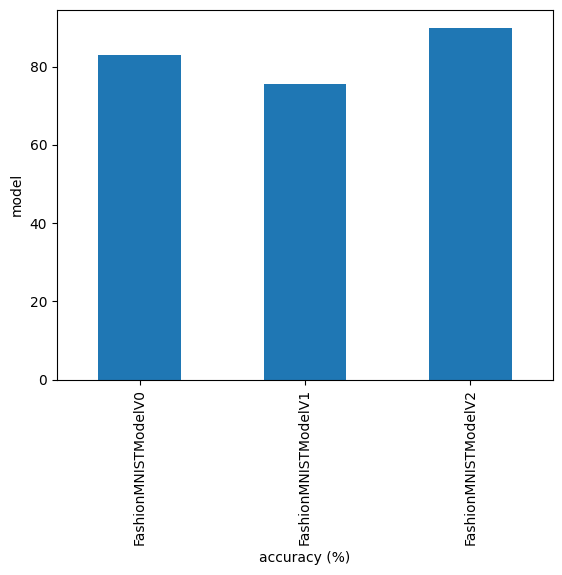

In [ ]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="bar")
plt.ylabel("model")
plt.xlabel("accuracy (%)")

## 9. Make and evaluate random predictions with best model


In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample,dim=0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logits = model(sample)

      # Get prediction probability (logits -> pred prob)
      pred_prob = torch.softmax(pred_logits.squeeze(),dim=0)

      # Get pred_prob off the GPU for further calculation
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to run list into a tensor
  return torch.stack(pred_probs)


In [ ]:
img, label = test_data[0][:10]
img.shape, label

(torch.Size([1, 28, 28]), 9)

In [ ]:
import random
# random.seed(42)

test_samples = []
test_labels = []

for sample,label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Bag')

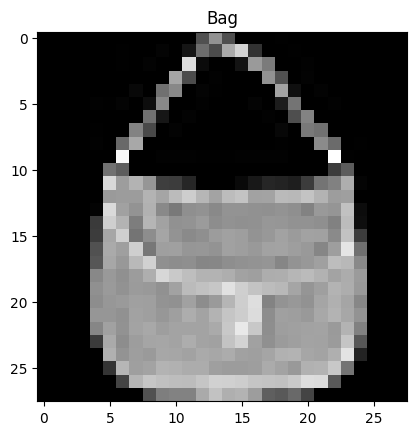

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]])

In [ ]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# View first two prediction probabilities.
pred_probs[:2]

tensor([[1.0777e-05, 1.5718e-08, 1.5891e-06, 4.7111e-09, 9.6731e-04, 2.2018e-06,
         7.1677e-07, 8.4503e-09, 9.9902e-01, 6.0981e-10],
        [1.7060e-09, 1.9715e-09, 2.8719e-08, 2.6039e-08, 1.1527e-07, 1.1031e-04,
         2.3376e-10, 9.9969e-01, 1.0538e-07, 2.0020e-04]])

In [ ]:
# convert pred prob to pred labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([8, 7, 2, 7, 4, 0, 1, 9, 3])

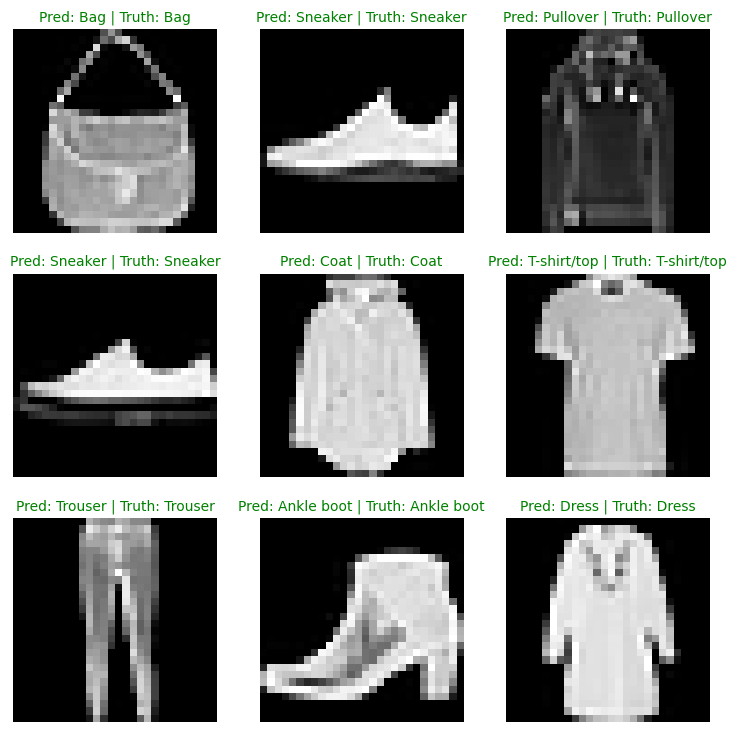

In [ ]:
# Plot predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows,ncols,i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find prediction label in text form
  pred_label = class_names[pred_classes[i]]

  # get the truth label 
  truth_label = class_names[test_labels[i]]

  # create a title for the plot
  titel_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(titel_text,fontsize=10,c="g")
  else:
    plt.title(titel_text,fontsize=10,c='r')
  
  plt.axis(False)


                                        

## 10 Making confusion matrix

1. Make prediction with our trained model on the test dataset
2. Make a confusion matrix `torchmatrix.ConfusionMatrix`
3. Plot the confusion matrix using  `mlxtend.plotting.plot_confusion_matrix()`

In [ ]:
import mlxtend

In [ ]:
mlxtend.__version__

'0.22.0'

In [ ]:
## Import tqdm.auto
from tqdm.auto import tqdm

# Make prediction with trained model
y_preds=[]

model_2.eval()

with torch.inference_mode():
  for X,y in tqdm(test_dataloader, desc="Making Prediction..."):
    # Send the data anf the target to target device
    X,y = X.to(device),y.to(device)

    # Do the forward pass
    y_logit = model_2(X)

    # Turn predictions fro logits->prediction probabilities -> prediction labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
    # y_pred = y_logit.softmax(dim=1).argmax(dim=1)

    # Put prediction on CPU for evaluation
    y_preds.append(y_pred.cpu())

  # Concatenate list of prediction into a tensor
  # print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor



Making Prediction...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([8, 5, 2,  ..., 5, 4, 2])

In [ ]:
test_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

In [ ]:
# see if required packages are installed and if not, install then...
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split('.')[1])>=19, "mlxtend version should be 0.19 or higher"
except:
  !pip install torchmetrics -U mlxtend
  # import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.22.0


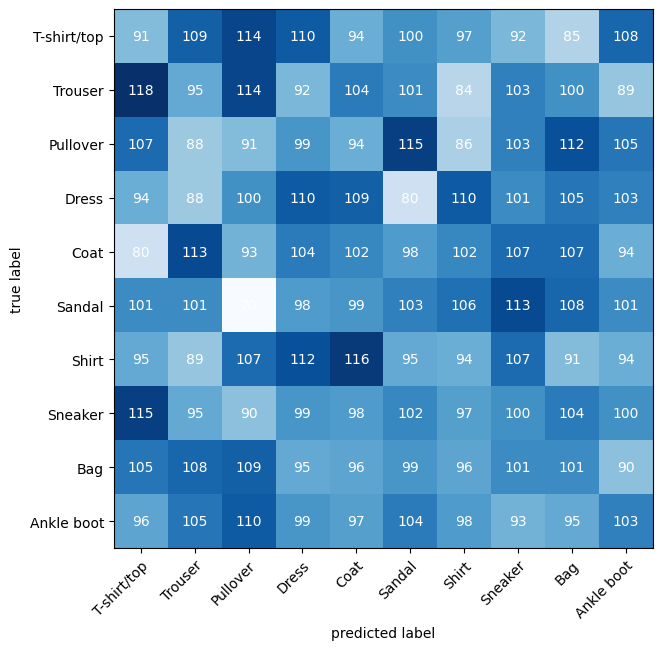

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(task='multiclass',num_classes=len(class_names))

confmat_tensor = confmat(preds=y_pred_tensor,
                         target = test_data.targets)

# 3. plt the confmat 
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(), # matplot lib likes working with with numpy
    class_names=class_names,
    figsize=(10,7)
)

# 11 . save and load best performing model

In [ ]:
from pathlib import Path

# Create model directory path
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model
MODEL_NAME = '03_Pytorch_cv_model_2.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model statedict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/03_Pytorch_cv_model_2.pth


In [ ]:
# create a new instance of model_
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape = len(class_names))

#Load in the save model state_dict()

loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:

model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.26846742630004883,
 'model_acc': 90.01597444089457}

In [ ]:
# Evaluate the loaded model

torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn_3,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.2692723870277405,
 'model_acc': 89.99600638977635}

In [ ]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results['model_loss']),
              atol=1e-02)

tensor(True)